<a href="https://colab.research.google.com/github/dustiny5/DS-Unit-1-Sprint-3-Data-Storytelling/blob/master/module2-choose-appropriate-visualizations/LS_DS_222_Choose_appropriate_visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_
# Choose appropriate visualizations

Objectives
- fix misleading visualizations
- use Seaborn to visualize distributions and relationships with continuous and discrete variables

Links
- [How to Spot Visualization Lies](https://flowingdata.com/2017/02/09/how-to-spot-visualization-lies/)
- [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary)
- [Choosing a Python Visualization Tool flowchart](http://pbpython.com/python-vis-flowchart.html)
- [Searborn example gallery](http://seaborn.pydata.org/examples/index.html) & [tutorial](http://seaborn.pydata.org/tutorial.html)


# Upgrade Seaborn

Make sure you have at least version 0.9.0.

On Colab, go to **Restart runtime** after you run the `pip` command.

In [1]:
!pip install --upgrade seaborn

    100% |████████████████████████████████| 215kB 24.1MB/s 
  Found existing installation: seaborn 0.7.1
    Uninstalling seaborn-0.7.1:
      Successfully uninstalled seaborn-0.7.1


In [1]:
import seaborn as sns
sns.__version__

'0.9.0'

# Fix misleading visualizations

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
!wget https://raw.githubusercontent.com/LambdaSchool/DS-Unit-1-Sprint-3-Data-Storytelling/master/module2-choose-appropriate-visualizations/misleading.py
    
import misleading

--2019-04-02 16:04:18--  https://raw.githubusercontent.com/LambdaSchool/DS-Unit-1-Sprint-3-Data-Storytelling/master/module2-choose-appropriate-visualizations/misleading.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1258 (1.2K) [text/plain]
Saving to: ‘misleading.py’

misleading.py       100%[===================>]   1.23K  --.-KB/s    in 0s      

2019-04-02 16:04:18 (151 MB/s) - ‘misleading.py’ saved [1258/1258]



### Fix misleading plot #1

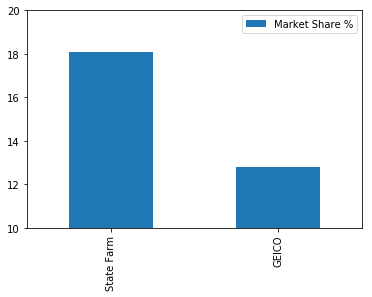

In [4]:
misleading.plot1();
#misleading?? to get the source code of the library

Y-axis starts at 10 and needs to start at 0. Makes the bar look bigger or smaller in comparison to the other.

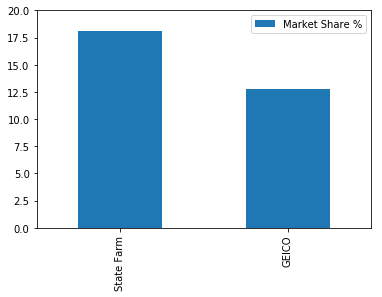

In [6]:
insurance = pd.DataFrame(
    index=['State Farm', 'GEICO'], 
    data={'Market Share %': [18.07, 12.79]})


insurance.plot.bar(ylim=(0, 20))

### Fix misleading plot #2

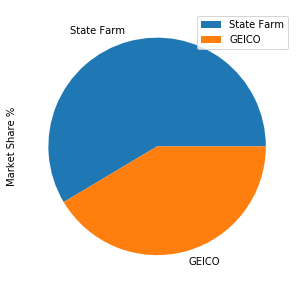

In [7]:
misleading.plot2();

Show's only 2 company that control 100% of the market. There are other companies, "Other"

In [10]:
#Add other to the pie
other = pd.DataFrame(
    index=['Other'], 
    data={'Market Share %': [100 - 18.07 - 12.79]})
insurance = insurance.append(other)
insurance

,Market Share %
State Farm,18.07
GEICO,12.79
Other,69.14


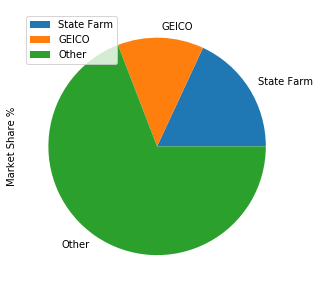

In [11]:
insurance.plot.pie('Market Share %', figsize=(5,5))

## Fix misleading plot #3

_If you're on Jupyter (not Colab) then uncomment and run this cell below:_

In [0]:
# import altair as alt
# alt.renderers.enable('notebook')

In [12]:
misleading.plot3()
#Related to a population heatmap

Chart({
  data: UrlData({
    format: TopoDataFormat({
      feature: 'states',
      type: 'topojson'
    }),
    url: 'https://vega.github.io/vega-datasets/data/us-10m.json'
  }),
  encoding: EncodingWithFacet({
    color: Color({
      shorthand: 'State Farm policy premiums',
      type: 'quantitative'
    })
  }),
  height: 300,
  mark: 'geoshape',
  projection: Projection({
    type: 'albersUsa'
  }),
  transform: [LookupTransform({
    from: LookupData({
      data:                    state  id  State Farm policy premiums  \
      0                Alabama   1                      768213   
      1                 Alaska   2                      128613   
      2                Arizona   4                      760003   
      3               Arkansas   5                      454931   
      4             California   6                     3655463   
      5               Colorado   8                      827143   
      6            Connecticut   9                      169773   
      7               Delaware  10                      191319   
      8   District of Columbia  11                       67231   
      9                Florida  12                     2806322   
      10               Georgia  13                     1761224   
      11                Hawaii  15                      133498   
      12                 Idaho  16                      130613   
      13              Illinois  17                     2256543   
      14               Indiana  18                      861382   
      15                  Iowa  19                      368898   
      16                Kansas  20                      351343   
      17              Kentucky  21                      680433   
      18             Louisiana  22                     1415980   
      19                 Maine  23                      101111   
      20              Maryland  24                      883401   
      21         Massachusetts  25                           0   
      22              Michigan  26                     1580398   
      23             Minnesota  27                      851940   
      24           Mississippi  28                      467887   
      25              Missouri  29                      883774   
      26               Montana  30                      156816   
      27              Nebraska  31                      273727   
      28                Nevada  32                      404688   
      29         New Hampshire  33                      103340   
      30            New Jersey  34                      619623   
      31            New Mexico  35                      261922   
      32              New York  36                     1666653   
      33        North Carolina  37                      842368   
      34          North Dakota  38                       67282   
      35                  Ohio  39                     1240075   
      36              Oklahoma  40                      636063   
      37                Oregon  41                      564416   
      38          Pennsylvania  42                     1654528   
      39          Rhode Island  44                           0   
      40        South Carolina  45                      874436   
      41          South Dakota  46                      101912   
      42             Tennessee  47                      889329   
      43                 Texas  48                     3395165   
      44                  Utah  49                      300403   
      45               Vermont  50                       30003   
      46              Virginia  51                      878312   
      47            Washington  53                      794882   
      48         West Virginia  54                      323608   
      49             Wisconsin  55                      443680   
      50               Wyoming  56                       90412   
      51           Puerto Rico  72                           0   
      
          BERKSHIRE HATH

# Use Seaborn to visualize distributions and relationships with continuous and discrete variables

## 1. Anscombe dataset

### Load dataset

In [0]:
df = sns.load_dataset('anscombe')

### See the data's shape

In [15]:
df.shape

(44, 3)

### See the data

In [16]:
df

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


### [Group by](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) `'dataset'`

In [0]:
group = df.groupby('dataset')


### [Describe](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html) the groups

In [26]:
group.describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

### Get the [count](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.count.html), for each column in each group

In [28]:
group.count()

,x,y
dataset,,
I,11,11
II,11,11
III,11,11
IV,11,11


### Get the [mean](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html) ...

In [29]:
group.mean()

,x,y
dataset,,
I,9.0,7.500909
II,9.0,7.500909
III,9.0,7.500000
IV,9.0,7.500909


### Get the [standard deviation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.std.html) ...

In [30]:
group.std()
#All 4 datasets same

,x,y
dataset,,
I,3.316625,2.031568
II,3.316625,2.031657
III,3.316625,2.030424
IV,3.316625,2.030579


### Get the [correlation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) ...

In [31]:
group.corr()
#All 4 dataset have similar correlation

x         y
dataset                      
I       x  1.000000  0.816421
        y  0.816421  1.000000
II      x  1.000000  0.816237
        y  0.816237  1.000000
III     x  1.000000  0.816287
        y  0.816287  1.000000
IV      x  1.000000  0.816521
        y  0.816521  1.000000

### Use pandas to [plot](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) the groups, as scatter plots

dataset
I      AxesSubplot(0.125,0.125;0.775x0.755)
II     AxesSubplot(0.125,0.125;0.775x0.755)
III    AxesSubplot(0.125,0.125;0.775x0.755)
IV     AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

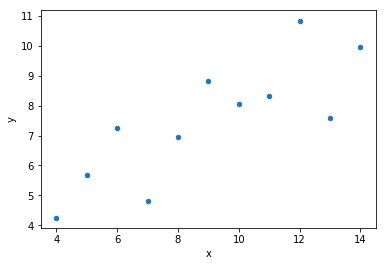

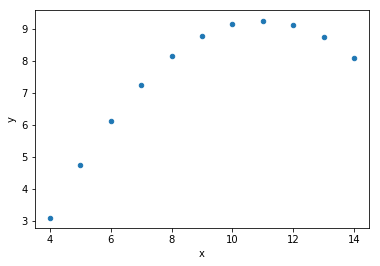

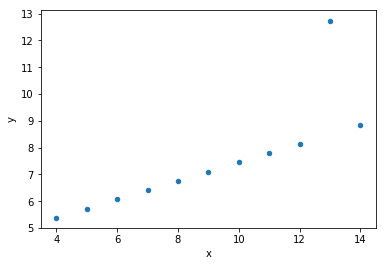

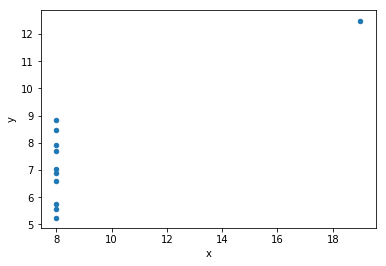

In [34]:
group.plot('x', 'y', kind='scatter')

### Use Seaborn to make [relational plots](http://seaborn.pydata.org/generated/seaborn.relplot.html)

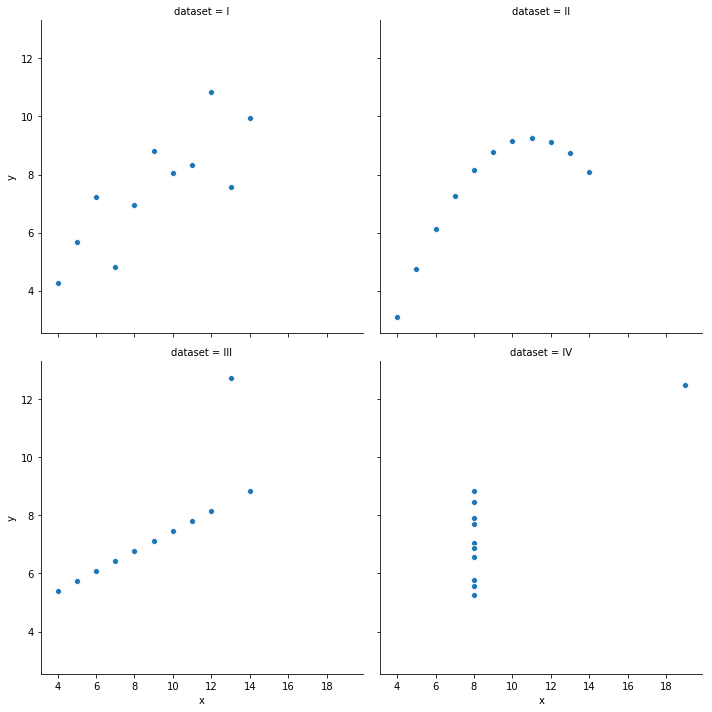

In [41]:
sns.relplot('x', 'y', col='dataset', data=df, col_wrap=2)

### Use Seaborn to make [linear model plots](http://seaborn.pydata.org/generated/seaborn.lmplot.html)

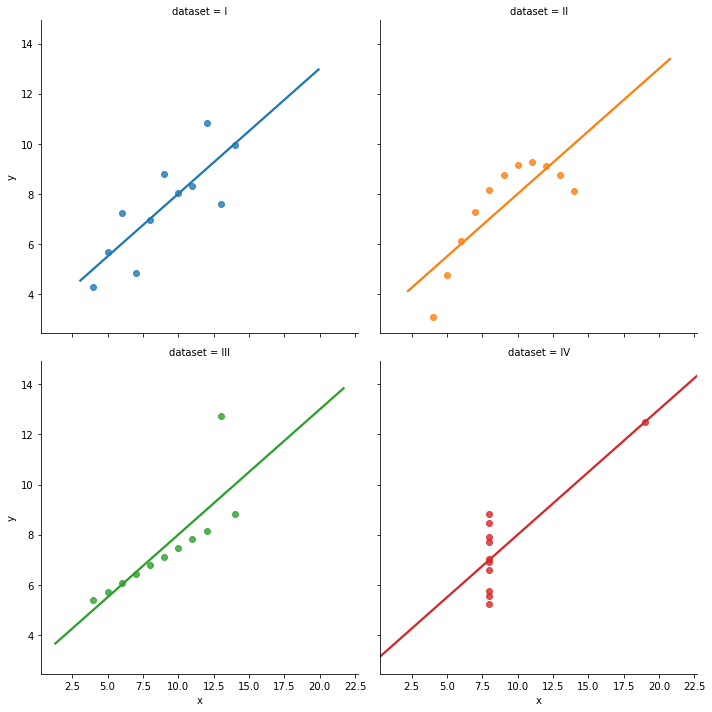

In [39]:
sns.lmplot('x', 'y', col='dataset', hue='dataset', data=df, col_wrap=2, ci=None)

#### Links
- [Seaborn examples: Anscombe's quartet](http://seaborn.pydata.org/examples/anscombes_quartet.html)
- [Wikipedia: Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)
- [The Datasaurus Dozen](https://www.autodeskresearch.com/publications/samestats)

## 2. Tips dataset

### Load dataset

In [0]:
tips = sns.load_dataset('tips')

### See the data's shape

In [43]:
tips.shape

(244, 7)

### See the first 5 rows

In [44]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [0]:
tips['smoker'] = tips['smoker'].replace({'No':0, 'Yes':1})

In [53]:
(tips['sex'] == 'Female').astype(int)

0      1
1      0
2      0
3      0
4      1
5      0
6      0
7      0
8      0
9      0
10     0
11     1
12     0
13     0
14     1
15     0
16     1
17     0
18     1
19     0
20     0
21     1
22     1
23     0
24     0
25     0
26     0
27     0
28     0
29     1
      ..
214    1
215    1
216    0
217    0
218    0
219    1
220    0
221    1
222    0
223    1
224    0
225    1
226    1
227    0
228    0
229    1
230    0
231    0
232    0
233    0
234    0
235    0
236    0
237    0
238    1
239    0
240    1
241    0
242    0
243    1
Name: sex, Length: 244, dtype: int64

### Describe the data

In [45]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [47]:
tips.describe(exclude=np.number)

,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


### Make univariate [distribution plots](https://seaborn.pydata.org/generated/seaborn.distplot.html)

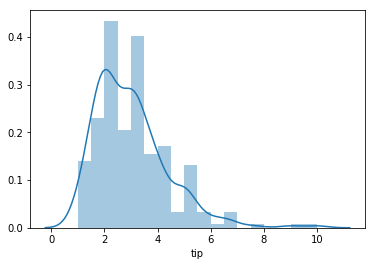

In [55]:
sns.distplot(tips['tip'])

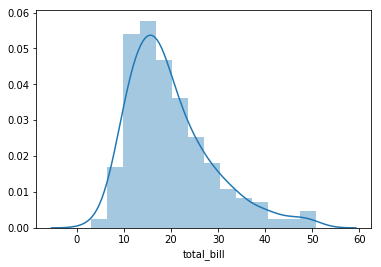

In [54]:
sns.distplot(tips['total_bill'])

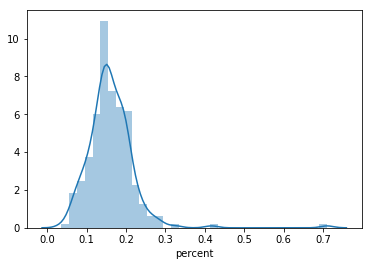

In [56]:
tips['percent'] = tips['tip']/tips['total_bill']
sns.distplot(tips['percent'])

In [60]:
tips['percent'].value_counts(bins=20)

(0.137, 0.171]     78
(0.171, 0.204]     60
(0.103, 0.137]     42
(0.0694, 0.103]    25
(0.204, 0.238]     20
(0.238, 0.272]      7
(0.034, 0.0694]     6
(0.272, 0.306]      3
(0.306, 0.339]      1
(0.677, 0.71]       1
(0.407, 0.44]       1
(0.643, 0.677]      0
(0.373, 0.407]      0
(0.44, 0.474]       0
(0.474, 0.508]      0
(0.508, 0.542]      0
(0.542, 0.575]      0
(0.575, 0.609]      0
(0.609, 0.643]      0
(0.339, 0.373]      0
Name: percent, dtype: int64

In [63]:
tips['percent'].round(2).value_counts()

0.14    27
0.15    26
0.16    22
0.20    22
0.12    17
0.19    16
0.18    16
0.17    14
0.13    12
0.10    11
0.08     8
0.11     7
0.21     7
0.07     6
0.22     6
0.24     5
0.09     4
0.23     4
0.06     3
0.28     2
0.26     2
0.33     1
0.04     1
0.42     1
0.29     1
0.27     1
0.71     1
0.25     1
Name: percent, dtype: int64

### Make bivariate [relational plots](https://seaborn.pydata.org/generated/seaborn.relplot.html)

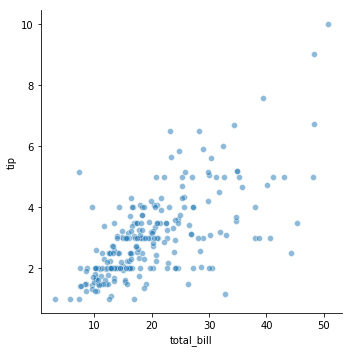

In [68]:
sns.relplot('total_bill', 'tip', data=tips, alpha=0.5)

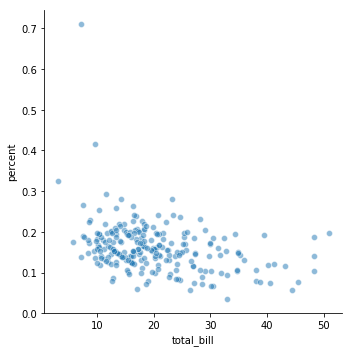

In [69]:
sns.relplot('total_bill', 'percent', data=tips, alpha=0.5)

### Make univariate [categorical plots](https://seaborn.pydata.org/generated/seaborn.catplot.html)

In [71]:
tips['sex'].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

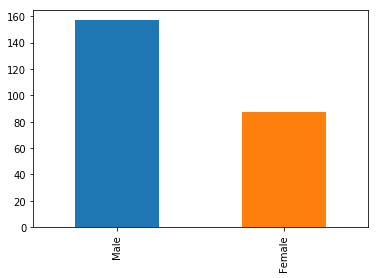

In [72]:
tips['sex'].value_counts().plot.bar()

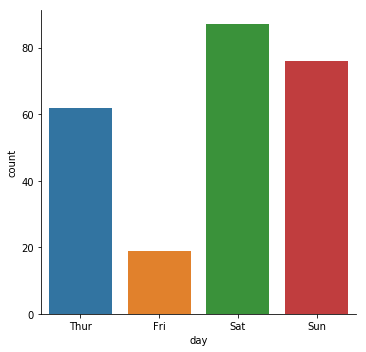

In [73]:
sns.catplot('day', data=tips, kind='count')

### Make bivariate [categorical plots](https://seaborn.pydata.org/generated/seaborn.catplot.html)

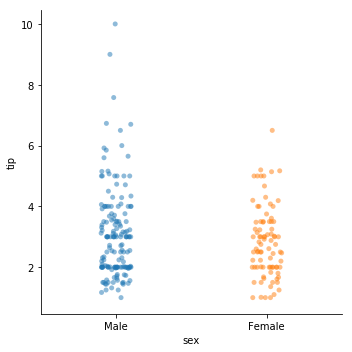

In [75]:
sns.catplot('sex', 'tip', data=tips, kind='strip', alpha=0.5)

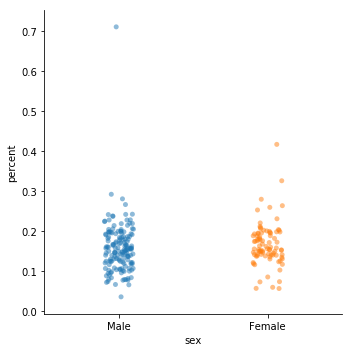

In [76]:
sns.catplot('sex', 'percent', data=tips, kind='strip', alpha=0.5)

## 3. Flights

### Load dataset

In [0]:
flights = sns.load_dataset('flights')

### See the data's shape

### See the first 5 rows

### Describe the data

### Plot year & passengers

### Plot month & passengers

### Create a [pivot table](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pivot_table.html) of passengers by month and year

### Plot the pivot table as a [heat map](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

# ASSIGNMENT

### 1.

Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

### 2.

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

##Misleading Plot 3

In [0]:
url = 'https://raw.githubusercontent.com/LambdaSchool/DS-Sprint-02-Storytelling-With-Data/master/module2-choose-appropriate-visualizations/direct_written_premium_by_state_by_group_private_passenger_auto.csv'
df = pd.read_csv(url)
#We want to normalize the market share of state farm group and berkshire hathaway group. Gives percentage of market share

In [78]:
df.head()

,state,id,STATE FARM GRP,BERKSHIRE HATHAWAY GRP,STATE TOTAL
0,Alabama,1,768213,282947,3025561
1,Alaska,2,128613,81366,454623
2,Arizona,4,760003,604049,4373055
3,Arkansas,5,454931,96908,1777917
4,California,6,3655463,2091720,25255501


In [81]:
df = df.rename(columns={'STATE FARM GRP': 'state farm premiums', 'BERKSHIRE HATHAWAY GRP': 'berkshire hathaway premiums'})
df['state farm market share %'] = df['state farm premiums'] / df['STATE TOTAL']
df['berkshire hathaway market share %'] = df['berkshire hathaway premiums'] / df['STATE TOTAL']
df.head()

,state,id,state farm premiums,berkshire hathaway premiums,STATE TOTAL,state farm market share %,berkshire hathaway market share %
0,Alabama,1,768213,282947,3025561,0.253908,0.093519
1,Alaska,2,128613,81366,454623,0.282900,0.178975
2,Arizona,4,760003,604049,4373055,0.173792,0.138130
3,Arkansas,5,454931,96908,1777917,0.255879,0.054506
4,California,6,3655463,2091720,25255501,0.144739,0.082822


In [89]:
import altair as alt
from vega_datasets import data

states = alt.topo_feature(data.us_10m.url, 'states')
variable = 'state farm market share %'

alt.Chart(states).mark_geoshape().encode(alt.Color(variable, type='quantitative')
                                        ).transform_lookup(lookup='id', from_=alt.LookupData(df,'id', [variable])
                                        ).properties(width=500, height=300
                                        ).project(type='albersUsa')

Chart({
  data: UrlData({
    format: TopoDataFormat({
      feature: 'states',
      type: 'topojson'
    }),
    url: 'https://vega.github.io/vega-datasets/data/us-10m.json'
  }),
  encoding: EncodingWithFacet({
    color: Color({
      shorthand: 'state farm market share %',
      type: 'quantitative'
    })
  }),
  height: 300,
  mark: 'geoshape',
  projection: Projection({
    type: 'albersUsa'
  }),
  transform: [LookupTransform({
    from: LookupData({
      data:                    state  id  state farm premiums  \
      0                Alabama   1               768213   
      1                 Alaska   2               128613   
      2                Arizona   4               760003   
      3               Arkansas   5               454931   
      4             California   6              3655463   
      5               Colorado   8               827143   
      6            Connecticut   9               169773   
      7               Delaware  10               191319   
      8   District of Columbia  11                67231   
      9                Florida  12              2806322   
      10               Georgia  13              1761224   
      11                Hawaii  15               133498   
      12                 Idaho  16               130613   
      13              Illinois  17              2256543   
      14               Indiana  18               861382   
      15                  Iowa  19               368898   
      16                Kansas  20               351343   
      17              Kentucky  21               680433   
      18             Louisiana  22              1415980   
      19                 Maine  23               101111   
      20              Maryland  24               883401   
      21         Massachusetts  25                    0   
      22              Michigan  26              1580398   
      23             Minnesota  27               851940   
      24           Mississippi  28               467887   
      25              Missouri  29               883774   
      26               Montana  30               156816   
      27              Nebraska  31               273727   
      28                Nevada  32               404688   
      29         New Hampshire  33               103340   
      30            New Jersey  34               619623   
      31            New Mexico  35               261922   
      32              New York  36              1666653   
      33        North Carolina  37               842368   
      34          North Dakota  38                67282   
      35                  Ohio  39              1240075   
      36              Oklahoma  40               636063   
      37                Oregon  41               564416   
      38          Pennsylvania  42              1654528   
      39          Rhode Island  44                    0   
      40        South Carolina  45               874436   
      41          South Dakota  46               101912   
      42             Tennessee  47               889329   
      43                 Texas  48              3395165   
      44                  Utah  49               300403   
      45               Vermont  50                30003   
      46              Virginia  51               878312   
      47            Washington  53               794882   
      48         West Virginia  54               323608   
      49             Wisconsin  55               443680   
      50               Wyoming  56                90412   
      51           Puerto Rico  72                    0   
      
          berkshire hathaway premiums  STATE TOTAL  state farm market share %  \
      0                        282947      3025561                   0.253908   
      1                         81366       454623                   0.282900   
      2                        604049      4373055                   0.173792   
      3                         96908      1777917                   0.2

##Anscombe Dataset

In [0]:
df = sns.load_dataset('anscombe')

In [91]:
#Shape of df
df.shape

(44, 3)

In [95]:
df
#Shows 4 different datasets for x and y

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [96]:
group = df.groupby('dataset')

In [97]:
group.describe()
#Describe the 4 datasets
#All 4 with count 11, same mean, I-III with same quartiles with IV quartile has the same number

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

In [98]:
group.count()

,x,y
dataset,,
I,11,11
II,11,11
III,11,11
IV,11,11


In [99]:
group.mean()

,x,y
dataset,,
I,9.0,7.500909
II,9.0,7.500909
III,9.0,7.500000
IV,9.0,7.500909


In [100]:
group.std()

,x,y
dataset,,
I,3.316625,2.031568
II,3.316625,2.031657
III,3.316625,2.030424
IV,3.316625,2.030579


In [101]:
group.corr()

x         y
dataset                      
I       x  1.000000  0.816421
        y  0.816421  1.000000
II      x  1.000000  0.816237
        y  0.816237  1.000000
III     x  1.000000  0.816287
        y  0.816287  1.000000
IV      x  1.000000  0.816521
        y  0.816521  1.000000

dataset
I      AxesSubplot(0.125,0.125;0.775x0.755)
II     AxesSubplot(0.125,0.125;0.775x0.755)
III    AxesSubplot(0.125,0.125;0.775x0.755)
IV     AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

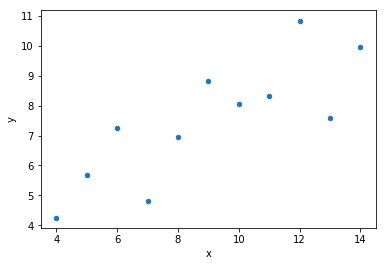

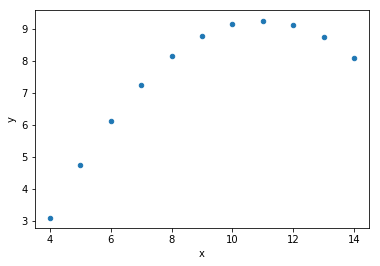

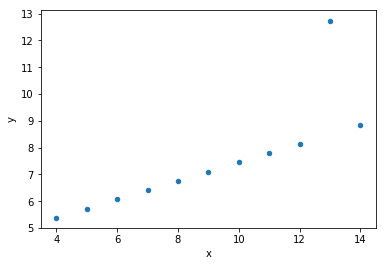

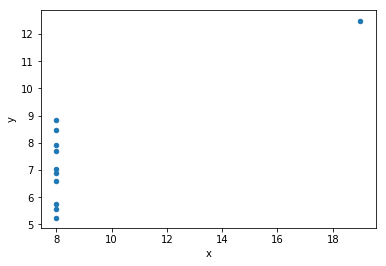

In [103]:
group.plot(x='x', y='y', kind='scatter')
#Even with the same count, mean, std, corr the graph can be different.

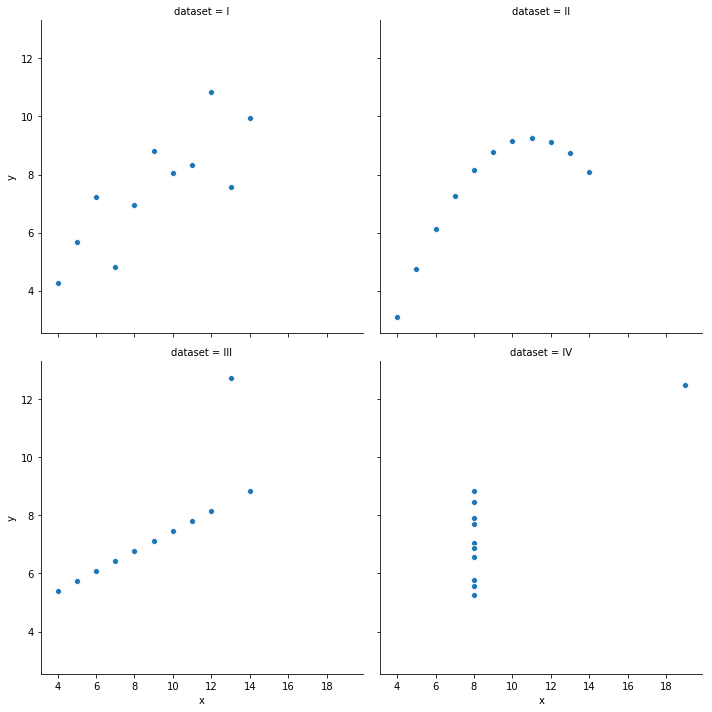

In [104]:
sns.relplot(x='x', y='y', col='dataset', data=df, col_wrap=2)

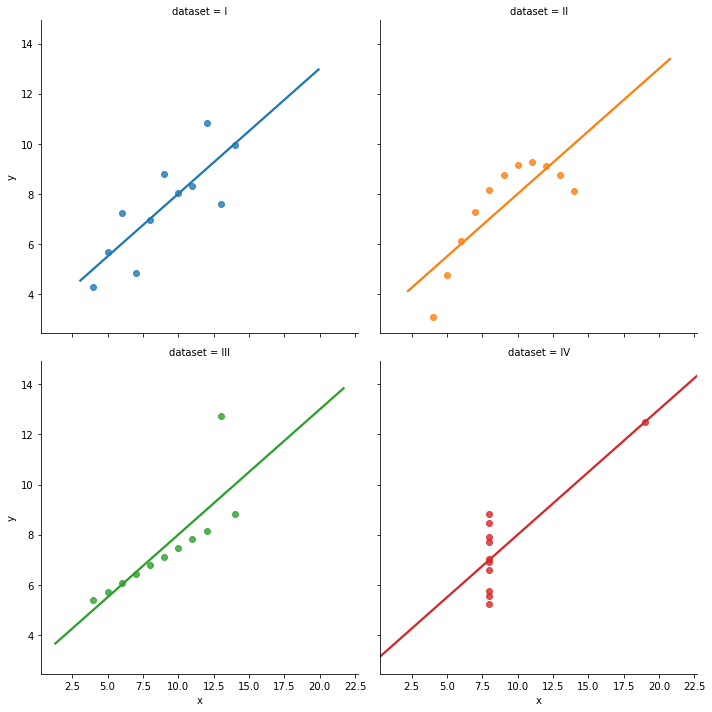

In [105]:
sns.lmplot(x='x', y='y', col='dataset', hue='dataset', data=df, col_wrap=2, ci=None)

##Tips Dataset

In [0]:
tips = sns.load_dataset('tips')

In [107]:
tips.shape

(244, 7)

In [108]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [0]:
#Change sex and smoker to binary
tips['smoker'] = (tips['smoker'] == 'Yes').astype(int)
tips['sex'] = (tips['sex'] == 'Female').astype(int)

In [115]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,1,0,Sun,Dinner,2
1,10.34,1.66,0,0,Sun,Dinner,3
2,21.01,3.50,0,0,Sun,Dinner,3
3,23.68,3.31,0,0,Sun,Dinner,2
4,24.59,3.61,1,0,Sun,Dinner,4


In [117]:
tips = tips.rename(columns={'sex':'is_female'})
tips.head()

,total_bill,tip,is_female,smoker,day,time,size
0,16.99,1.01,1,0,Sun,Dinner,2
1,10.34,1.66,0,0,Sun,Dinner,3
2,21.01,3.50,0,0,Sun,Dinner,3
3,23.68,3.31,0,0,Sun,Dinner,2
4,24.59,3.61,1,0,Sun,Dinner,4


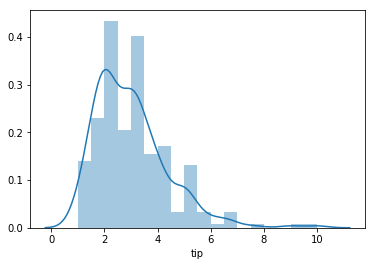

In [119]:
sns.distplot(tips['tip'])

In [120]:
tips['percent'] = tips['tip'] / tips['total_bill']
tips.head()

,total_bill,tip,is_female,smoker,day,time,size,percent
0,16.99,1.01,1,0,Sun,Dinner,2,0.059447
1,10.34,1.66,0,0,Sun,Dinner,3,0.160542
2,21.01,3.50,0,0,Sun,Dinner,3,0.166587
3,23.68,3.31,0,0,Sun,Dinner,2,0.139780
4,24.59,3.61,1,0,Sun,Dinner,4,0.146808


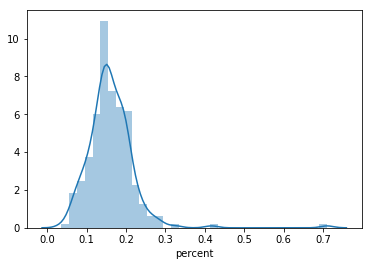

In [121]:
sns.distplot(tips['percent'])

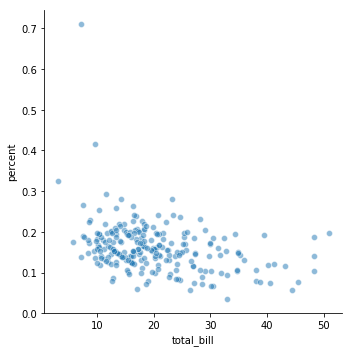

In [122]:
sns.relplot(x='total_bill', y='percent', data=tips, alpha=0.5)

In [133]:
tips['round_percent'] = tips['percent'].round(2)
tips

,total_bill,tip,is_female,smoker,day,time,size,percent,round_percent
0,16.99,1.01,1,0,Sun,Dinner,2,0.059447,0.06
1,10.34,1.66,0,0,Sun,Dinner,3,0.160542,0.16
2,21.01,3.50,0,0,Sun,Dinner,3,0.166587,0.17
3,23.68,3.31,0,0,Sun,Dinner,2,0.139780,0.14
4,24.59,3.61,1,0,Sun,Dinner,4,0.146808,0.15
5,25.29,4.71,0,0,Sun,Dinner,4,0.186240,0.19
6,8.77,2.00,0,0,Sun,Dinner,2,0.228050,0.23
7,26.88,3.12,0,0,Sun,Dinner,4,0.116071,0.12
8,15.04,1.96,0,0,Sun,Dinner,2,0.130319,0.13
9,14.78,3.23,0,0,Sun,Dinner,2,0.218539,0.22


In [134]:
table = tips.pivot_table(index='day', columns='is_female', values='round_percent')
table

is_female,0,1
day,,
Thur,0.165333,0.157188
Fri,0.143000,0.198889
Sat,0.151864,0.157500
Sun,0.162586,0.181111


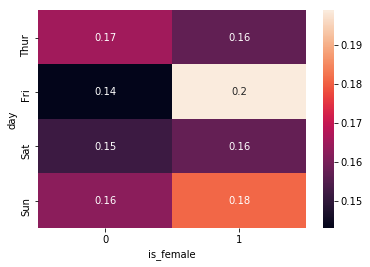

In [137]:
sns.heatmap(table, annot=True)

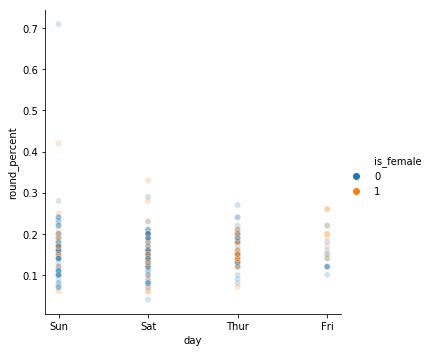

In [151]:
sns.relplot(x='day', y='round_percent', hue='is_female', data=tips, alpha=0.2)

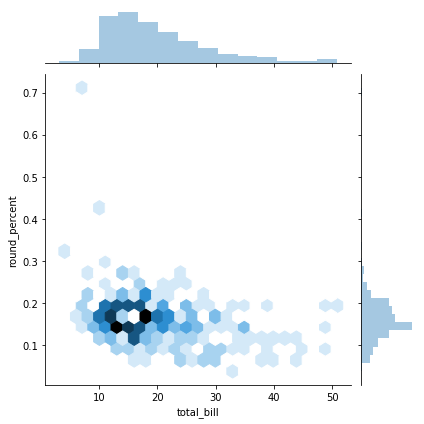

In [154]:
sns.jointplot(x='total_bill', y='round_percent', kind='hex', data=tips)

In [138]:
from google.colab import files
uploaded = files.upload()

Saving CAvideos.csv to CAvideos.csv


In [0]:
you = pd.read_csv('CAvideos.csv')

In [155]:
import altair as alt
from vega_datasets import data

# Since the data is more than 5,000 rows we'll import it from a URL
source = data.zipcodes.url

alt.Chart(source).mark_circle(size=3).encode(
    longitude='longitude:Q',
    latitude='latitude:Q',
    color='digit:N'
).project(
    type='albersUsa'
).properties(
    width=650,
    height=400
).transform_calculate(
    "digit", alt.expr.substring(alt.datum.zip_code, 0, 1)
)

Chart({
  data: 'https://vega.github.io/vega-datasets/data/zipcodes.csv',
  encoding: EncodingWithFacet({
    color: Color({
      shorthand: 'digit:N'
    }),
    latitude: Latitude({
      shorthand: 'latitude:Q'
    }),
    longitude: Longitude({
      shorthand: 'longitude:Q'
    })
  }),
  height: 400,
  mark: MarkDef({
    size: 3,
    type: 'circle'
  }),
  projection: Projection({
    type: 'albersUsa'
  }),
  transform: [CalculateTransform({
    as: 'digit',
    calculate: substring(datum.zip_code,0,1)
  })],
  width: 650
})

In [158]:
pd.read_csv(source)

,zip_code,latitude,longitude,city,state,county
0,501,40.922326,-72.637078,Holtsville,NY,Suffolk
1,544,40.922326,-72.637078,Holtsville,NY,Suffolk
2,601,18.165273,-66.722583,Adjuntas,PR,Adjuntas
3,602,18.393103,-67.180953,Aguada,PR,Aguada
4,603,18.455913,-67.145780,Aguadilla,PR,Aguadilla
5,604,18.493520,-67.135883,Aguadilla,PR,Aguadilla
6,605,18.465162,-67.141486,Aguadilla,PR,Aguadilla
7,606,18.172947,-66.944111,Maricao,PR,Maricao
8,610,18.288685,-67.139696,Anasco,PR,Anasco
9,611,18.279531,-66.802170,Angeles,PR,Utuado
